In [3]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

<h1>Assignment 2: Life Expectancy and You!</h1>

<b>Instructions:</b>
<ul>
<li>Use the worksheet below to act as a guide to exploring and examining the data in the dataset.
<li>Try to make things easy to read. Look at the formatting stuff above. 
<li>As long as you do what is asked, you can do things in many different ways. You may need to do a little searching. 
</ul>

### Please Use Formatting to Make it Clear What I Should be Looking at! Please!!! I Beg You!!!

In [4]:
#Load data and do some cleanup before starting
#Please don't change this stuff. 
dfLE = pd.read_csv("led.csv")
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfLE.groupby("Country", as_index=False).mean()
df = dfLE.copy()                                        # Create duplicate of data
df.replace([np.inf, - np.inf], np.nan, inplace = True)  # Exchange inf by NaN
df.dropna(inplace=True)
df.head()


,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.375,52.3125,4.136734e+09,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.125,98.0625,1.166938e+09,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.750,91.8750,7.345597e+10,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.125,47.6875,2.177835e+10,1.014710e+07,8.04375
5,Argentina,0.0,75.15625,106.0000,10.1250,7.966667,81.285714,2.0000,54.98125,11.3750,93.375,92.3750,1.641579e+11,2.012120e+07,16.50625


<h2>Part 1: Add a column for GDP per Capita (5pts)</h2>

Show print the labels along with just that column. Print 10 random rows of that data. 

Note: you'll have to look at the units to ensure you get it right. 

In [5]:
Population=df['Population']
Population=np.log(Population)
Population.head()

0    16.115318
1    13.454414
2    16.890508
3    16.132698
5    16.817285
Name: Population, dtype: float64

In [6]:
GDP=df['GDP']
lnGDP=np.log(GDP)
lnGDP.head()

0    22.143172
1    20.877649
2    25.019952
3    23.804182
5    25.824095
Name: GDP, dtype: float64

In [7]:
#Part 1
df['GDPPerCapita']=GDP/Population
df.head()

,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDPPerCapita
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.375,52.3125,4.136734e+09,9.972260e+06,8.21250,2.566958e+08
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.125,98.0625,1.166938e+09,6.969116e+05,12.13750,8.673269e+07
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.750,91.8750,7.345597e+10,2.164983e+07,12.71250,4.348949e+09
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.125,47.6875,2.177835e+10,1.014710e+07,8.04375,1.349951e+09
5,Argentina,0.0,75.15625,106.0000,10.1250,7.966667,81.285714,2.0000,54.98125,11.3750,93.375,92.3750,1.641579e+11,2.012120e+07,16.50625,9.761263e+09


### Part 2: Print a visualization of each distribution. Both regular (density) and cumulative. (15pts)

Print each distribution is some type of visualization, also print the cumulative distribution. 
<ul>
<li>5 points are for using some visualization that is effective.
<li>5 points for formatting things in a nice layout. Hint: for whatever chart you use, look into some formatting options. Think of what to try to Google for an example for printing multiple charts, a grid of charts, etc... and try to adapt one to yours. There is also a way to do it using some thinkstats/thinkplot stuff. 
<li><b>5 points are for doing it in an efficient way - just listing off each column is lots of typing... Remember, the #1 trait of programmers is laziness with respect to repetitive tasks. If we are doing the same thing over and over with tiny changes, try to think of a condensed way to do this...</b>
</ul>

In [8]:
df.columns

Index(['Country', 'isDeveloped', 'Lifeexpectancy', 'AdultMortality',
       'infantdeaths', 'Alcohol', 'HepatitisB', 'Measles', 'BMI',
       'under-fivedeaths', 'Polio', 'Diphtheria', 'GDP', 'Population',
       'Schooling', 'GDPPerCapita'],
      dtype='object')

array([[<AxesSubplot:title={'center':'isDeveloped'}>,
        <AxesSubplot:title={'center':'Lifeexpectancy'}>,
        <AxesSubplot:title={'center':'AdultMortality'}>,
        <AxesSubplot:title={'center':'infantdeaths'}>],
       [<AxesSubplot:title={'center':'Alcohol'}>,
        <AxesSubplot:title={'center':'HepatitisB'}>,
        <AxesSubplot:title={'center':'Measles'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'under-fivedeaths'}>,
        <AxesSubplot:title={'center':'Polio'}>,
        <AxesSubplot:title={'center':'Diphtheria'}>,
        <AxesSubplot:title={'center':'GDP'}>],
       [<AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Schooling'}>,
        <AxesSubplot:title={'center':'GDPPerCapita'}>, <AxesSubplot:>]],
      dtype=object)

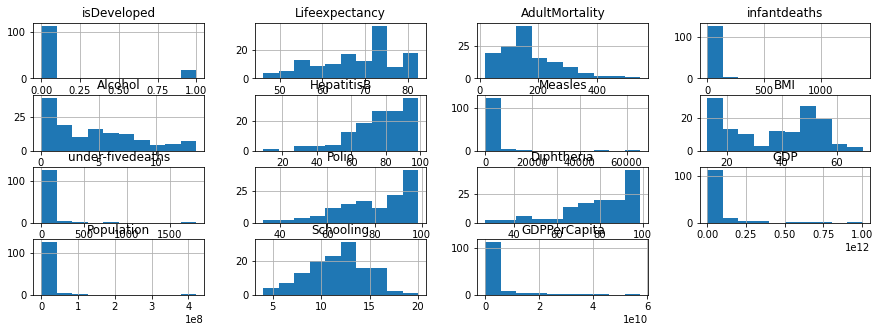

In [9]:
df.hist()

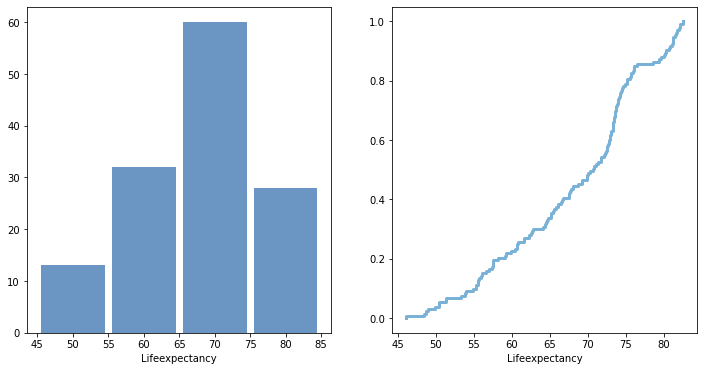

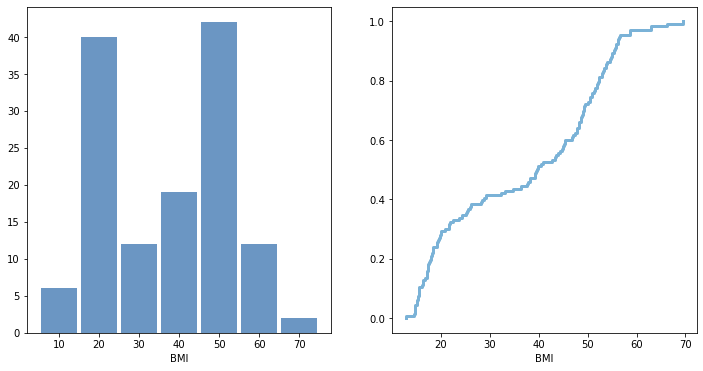

<Figure size 576x432 with 0 Axes>

In [10]:
col=['Lifeexpectancy','BMI']

i=0
while i < len(col):
    h = col[i]
    hist=thinkstats2.Hist(round(df[h],-1))
    cdf = thinkstats2.Cdf(df[h])
    thinkplot.PrePlot(2,1,2)
    thinkplot.Hist(hist)
    thinkplot.Config(xlabel=h)
    thinkplot.subplot(2)
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel=h)
    thinkplot.Show(xlabel=h)
    i = i + 1

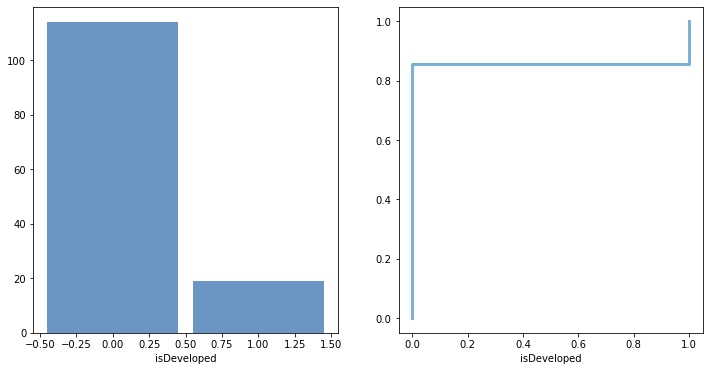

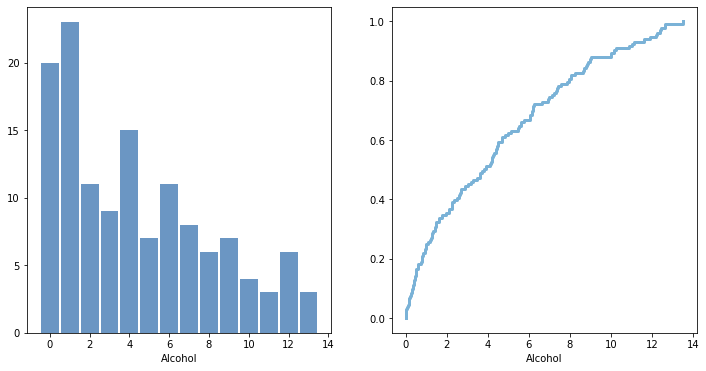

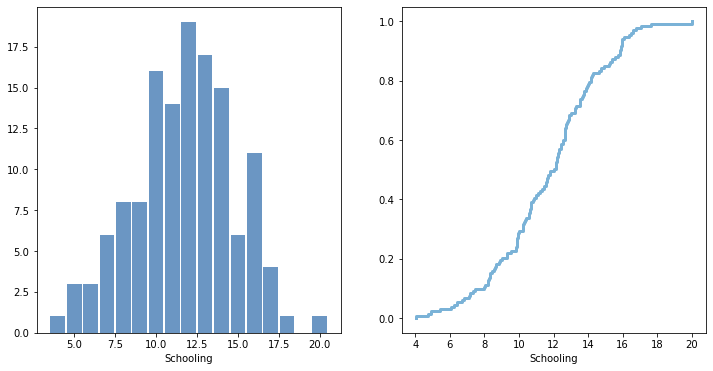

<Figure size 576x432 with 0 Axes>

In [11]:
from cProfile import label


col1=['isDeveloped','Alcohol','Schooling']

i=0
while i < len(col1):
    h = col1[i]
    hist=thinkstats2.Hist(round(df[h],0))
    cdf = thinkstats2.Cdf(df[h])
    thinkplot.PrePlot(2,1,2)
    thinkplot.Hist(hist)
    thinkplot.Config(xlabel=h)
    thinkplot.subplot(2)
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel=h)
    thinkplot.Show(xlabel=h)
    i = i + 1




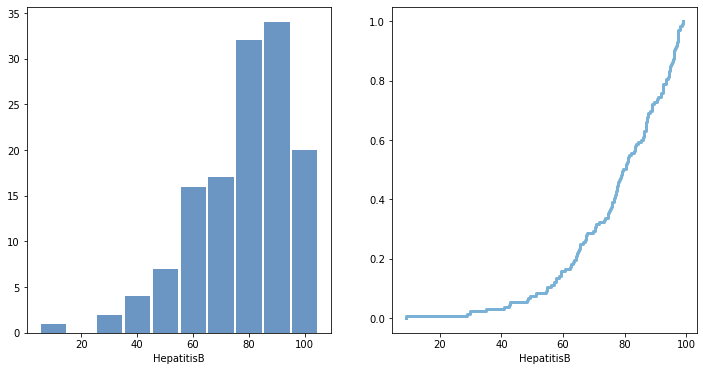

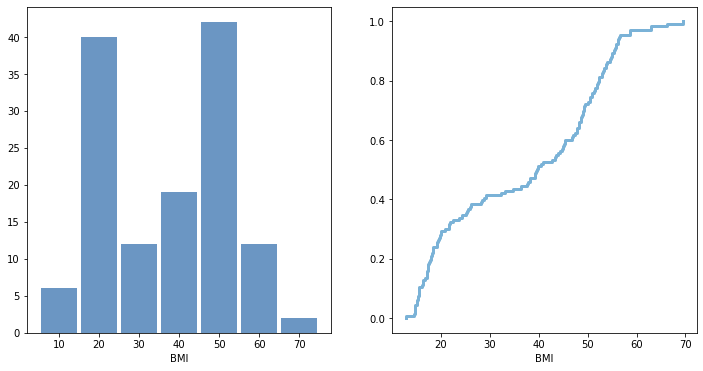

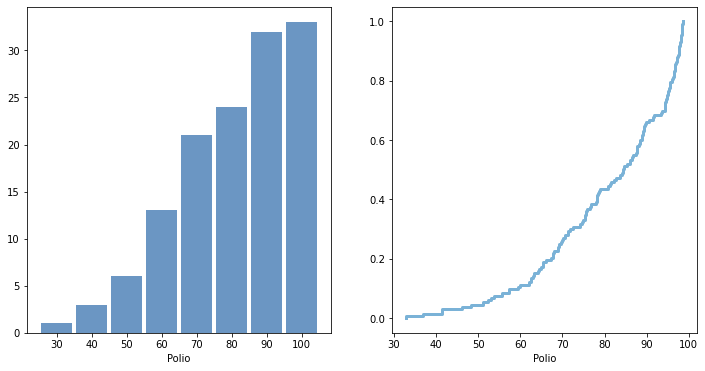

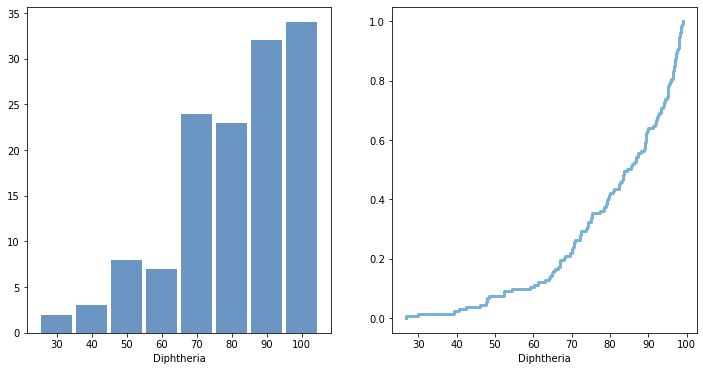

<Figure size 576x432 with 0 Axes>

In [12]:
col2=['HepatitisB','BMI','Polio','Diphtheria']
i=0
while i < len(col2):
    h = col2[i]
    hist=thinkstats2.Hist(round(df[h],-1))
    cdf = thinkstats2.Cdf(df[h])
    thinkplot.PrePlot(2,1,2)
    thinkplot.Hist(hist)
    thinkplot.Config(xlabel=h)
    thinkplot.subplot(2)
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel=h)
    thinkplot.Show()
    i = i + 1

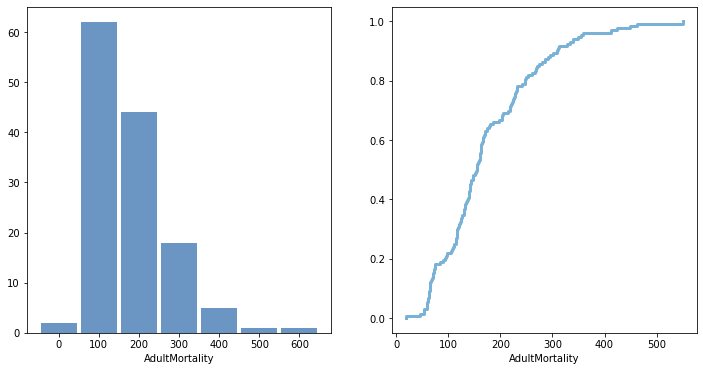

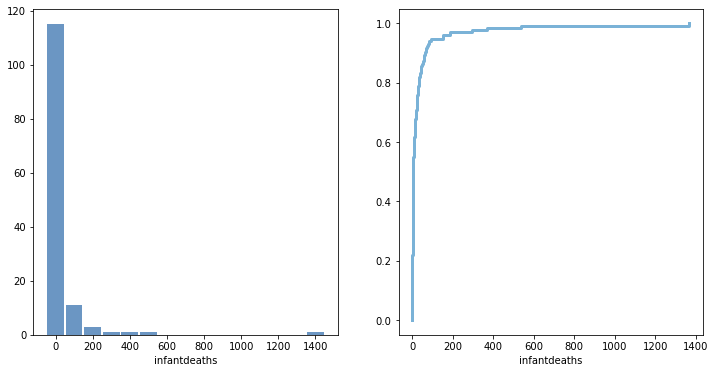

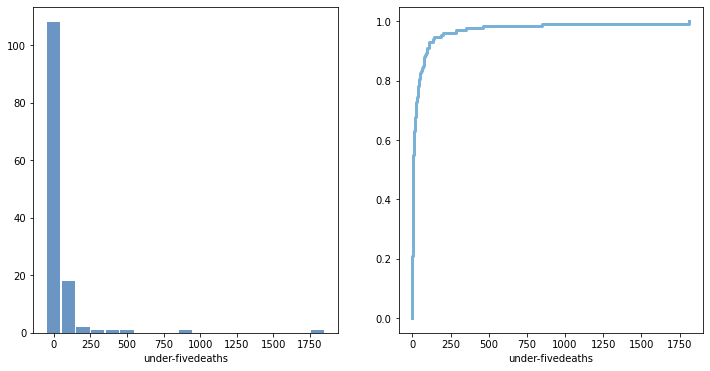

<Figure size 576x432 with 0 Axes>

In [13]:
col3=['AdultMortality','infantdeaths','under-fivedeaths']
i=0
while i < len(col3):
    h = col3[i]
    hist=thinkstats2.Hist(round(df[h],-2))
    cdf = thinkstats2.Cdf(df[h])
    thinkplot.PrePlot(2,1,2)
    thinkplot.Hist(hist)
    thinkplot.Config(xlabel=h)
    thinkplot.subplot(2)
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel=h)
    thinkplot.Show()
    i = i + 1


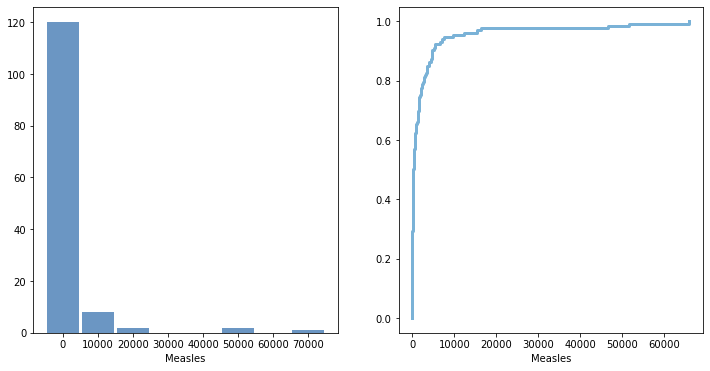

<Figure size 576x432 with 0 Axes>

In [14]:
col4=['Measles']
i=0
while i < len(col4):
    h = col4[i]
    hist=thinkstats2.Hist(round(df[h],-4))
    cdf = thinkstats2.Cdf(df[h])
    thinkplot.PrePlot(2,1,2)
    thinkplot.Hist(hist)
    thinkplot.Config(xlabel=h)
    thinkplot.subplot(2)
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel=h)
    thinkplot.Show()
    i = i + 1

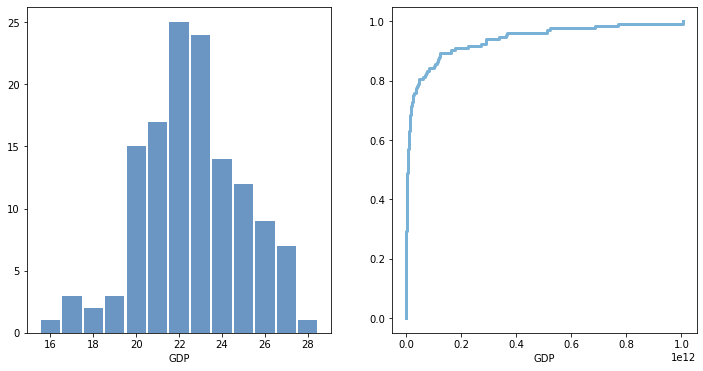

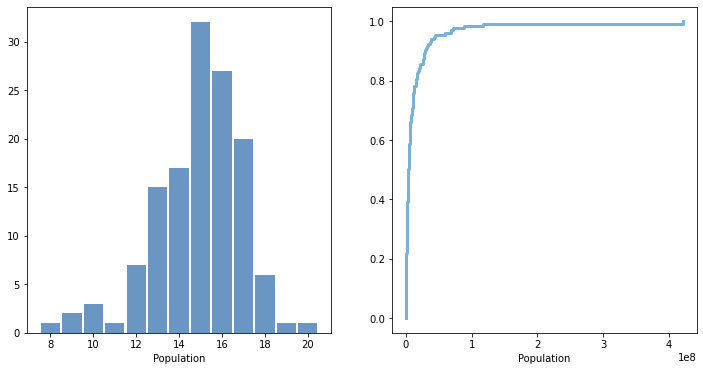

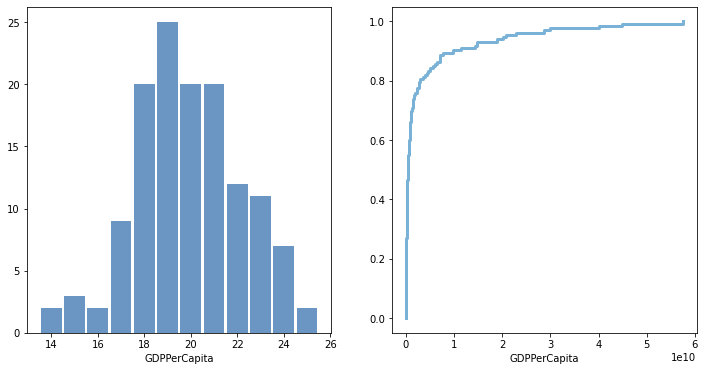

<Figure size 576x432 with 0 Axes>

In [15]:
col5=['GDP','Population','GDPPerCapita']
i=0
while i < len(col5):
    h = (col5[i])
    data = pd.Series(np.log(df[h]))
    hist=thinkstats2.Hist(round(data,0))
    cdf = thinkstats2.Cdf(df[h])
    thinkplot.PrePlot(2,1,2)
    thinkplot.Hist(hist)
    thinkplot.Config(xlabel=h)
    thinkplot.subplot(2)
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel=h)
    thinkplot.Show()
    i = i + 1

### Create an analytical distribution for SCHOOLING, and use it for a couple of things. (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing the distribution. Do it <b>without</b> using a fit() method. Plot the emperical data on the same graph as the analytical distribution. 
<li>5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 
</ul>

In [16]:
k2, p=ss.normaltest(df["Schooling"])
p

0.8061408621435778

we can not reject the hypothesis that the schooling data is normally distributed

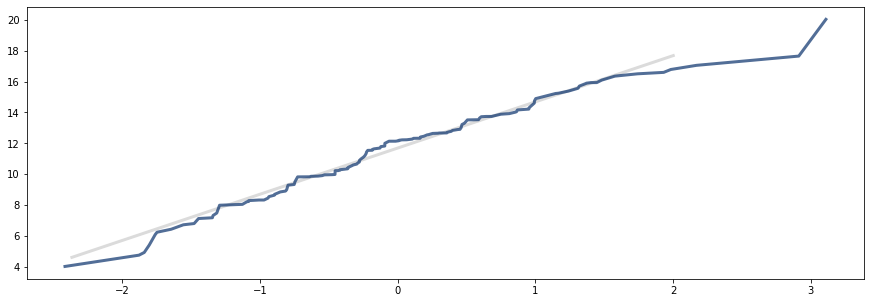

In [17]:
#Analytical for Schooling
thinkstats2.NormalProbabilityPlot(df["Schooling"])


In [18]:
mu = df["Schooling"].mean()
sigma = df["Schooling"].std()
normz = ss.norm(mu, sigma)

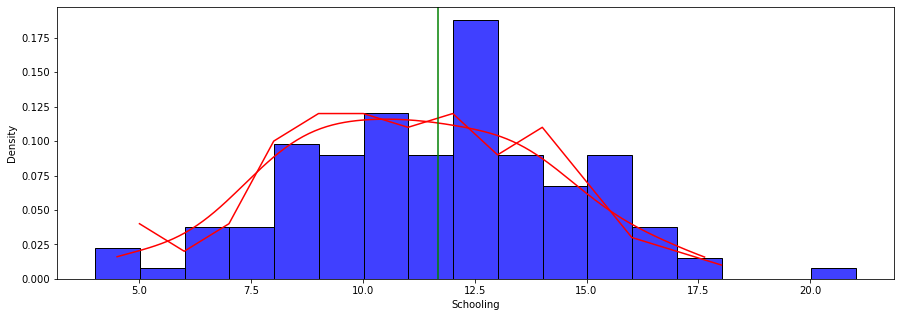

In [19]:
sns.histplot(data=normz.rvs(100), binwidth=1,color='red', stat="density", kde=True, element="poly",fill=False)
sns.histplot(data=df["Schooling"], binwidth=1, color="blue", stat="density")
plt.axvline(mu, color="green")

In [20]:
percentage=normz.cdf(1)
print(percentage)

0.00018806917282754434


In [21]:
df_canada=df[df["Country"]=="Canada"]
mu = df_canada["Schooling"].mean()
sigma = df_canada["Schooling"].std()
norm_canada = ss.norm(mu, sigma)
percent=norm_canada.cdf(1)
print(percent)
df_canada.head()

nan


,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDPPerCapita
30,Canada,0.0,81.6875,64.625,2.0,8.053333,28.846154,129.5,55.8625,2.0,85.3125,91.0625,3.384881e+11,1.136405e+07,15.875,2.083521e+10


### Part 3: Create another analytical distribution for GDP per Capita (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing it alongside the emperical. You have free reign on how. 
<li>5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?
<li>If you've judged GDP per cap to be unreliable, drop it. 
</ul>

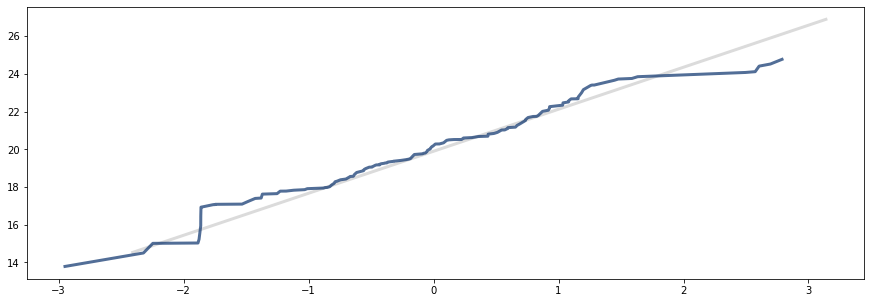

In [22]:
thinkstats2.NormalProbabilityPlot(np.log(df["GDPPerCapita"]))


This data fits a lognormal distribution model

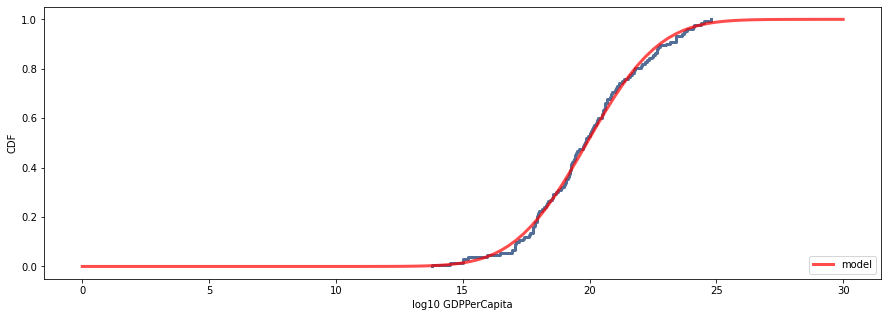

In [23]:

log_GPC=np.log(df["GDPPerCapita"])
cdf_GPC=thinkstats2.Cdf(log_GPC)
thinkplot.Cdf(cdf_GPC) 
mu, sigma = log_GPC.mean(), log_GPC.std()
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=30)
thinkplot.Plot(xs, ps, label='model', color='red')
thinkplot.Config(xlabel='log10 GDPPerCapita', ylabel='CDF', loc='lower right')


The analytical lognormal distribution model seem to accurately represent the GDPPerCapita since the graphs perfectly match each other

### Part 4: Visually identify correlations. Separate developed and not developed countries is some way. (15pts)

<ul>
<li>5 points are for effectively and clearly showing the visualizations used to evaluate correlations.
<li>10 points are for, in the process of visualizing, remove outliers that confound correlations. List outlier "filters" you used and justify why - was the data an error, a real value that is just way out of line, or somethingn else? Remember, you're trying to find things that have correlations with each other. Looking at a correlation between home size and income may not benefit from Jeff Bezos being included. It may be helpful to look at the results and revise. 
</ul>

In [24]:
#Visualize correlations. 
developed=df[df['isDeveloped']==1]
not_developed=df[df['isDeveloped']==0]

In [25]:
df2=df[['isDeveloped', 'Lifeexpectancy', 'AdultMortality','infantdeaths', 'Alcohol', 'HepatitisB', 'Measles', 'BMI',
       'under-fivedeaths', 'Polio', 'Diphtheria', 'GDP', 'Population','Schooling', 'GDPPerCapita']]

In [26]:
df4=developed[['Lifeexpectancy', 'AdultMortality','infantdeaths', 'Alcohol', 'HepatitisB', 'Measles', 'BMI',
       'under-fivedeaths', 'Polio', 'Diphtheria', 'GDP', 'Population','Schooling', 'GDPPerCapita']]

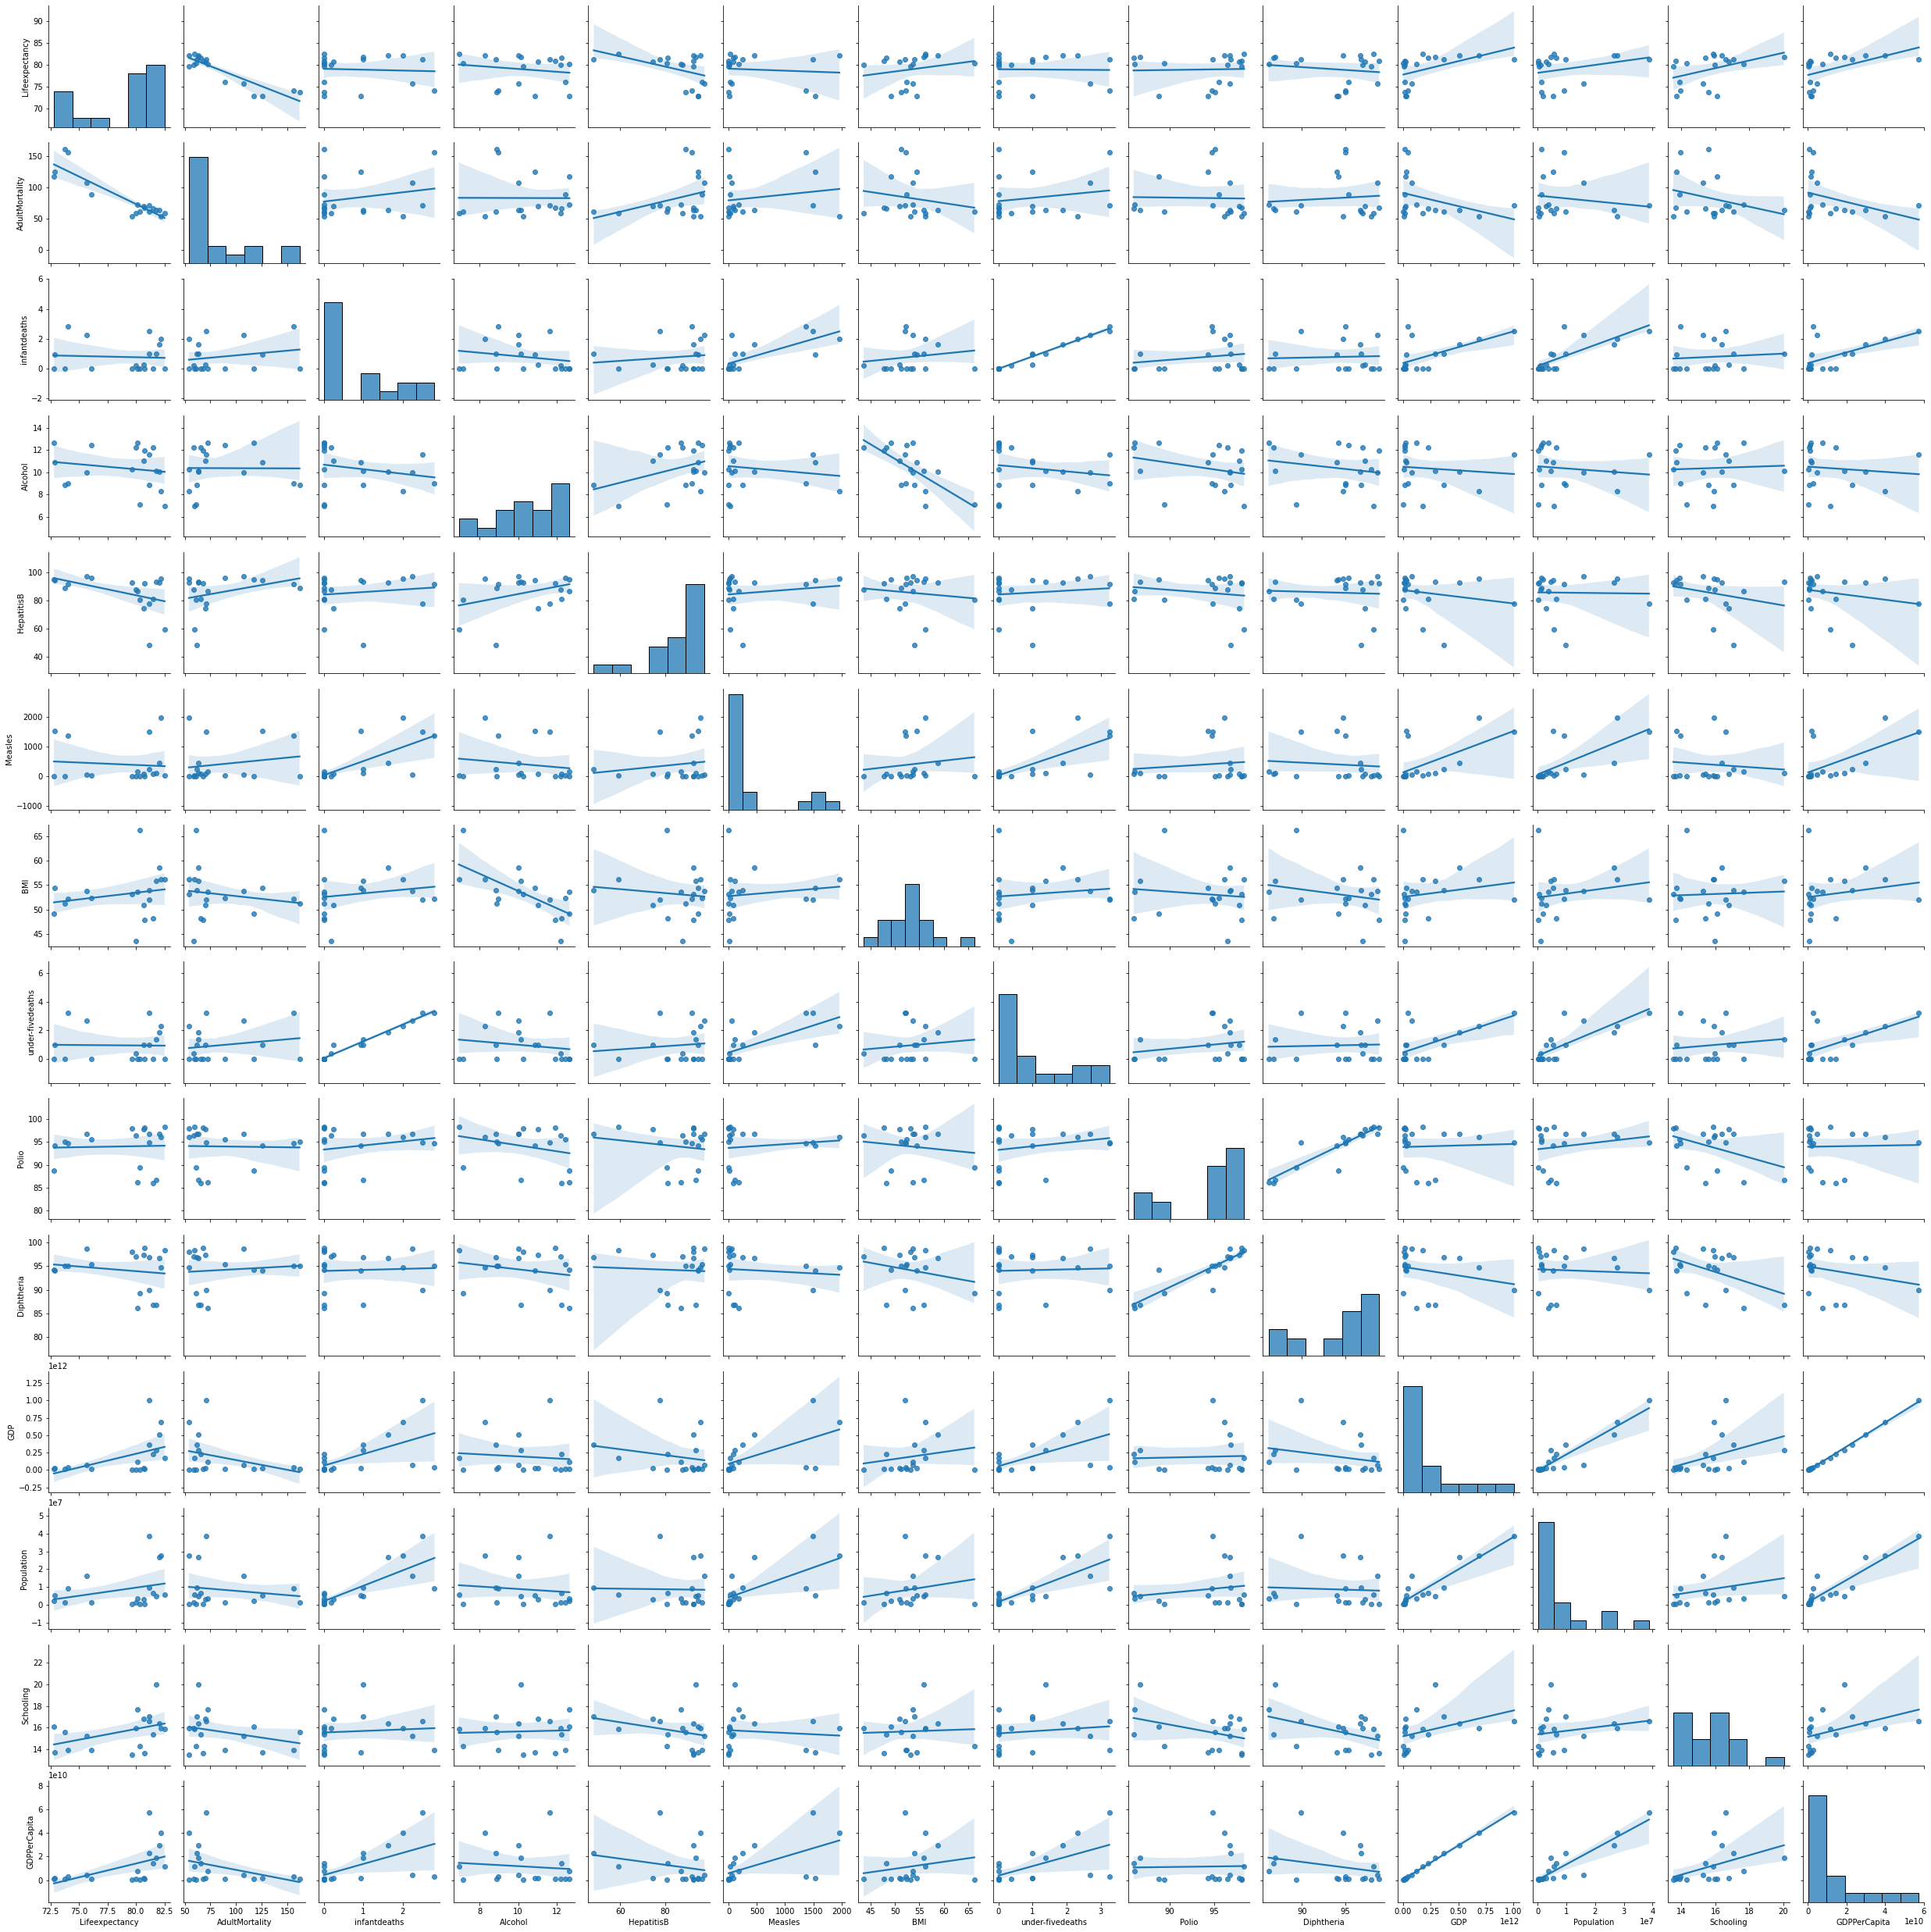

In [27]:
sns.pairplot(df4,kind="reg")

In [28]:
df3=not_developed[['Lifeexpectancy', 'AdultMortality','infantdeaths', 'Alcohol', 'HepatitisB', 'Measles', 'BMI',
       'under-fivedeaths', 'Polio', 'Diphtheria', 'GDP', 'Population','Schooling', 'GDPPerCapita']]

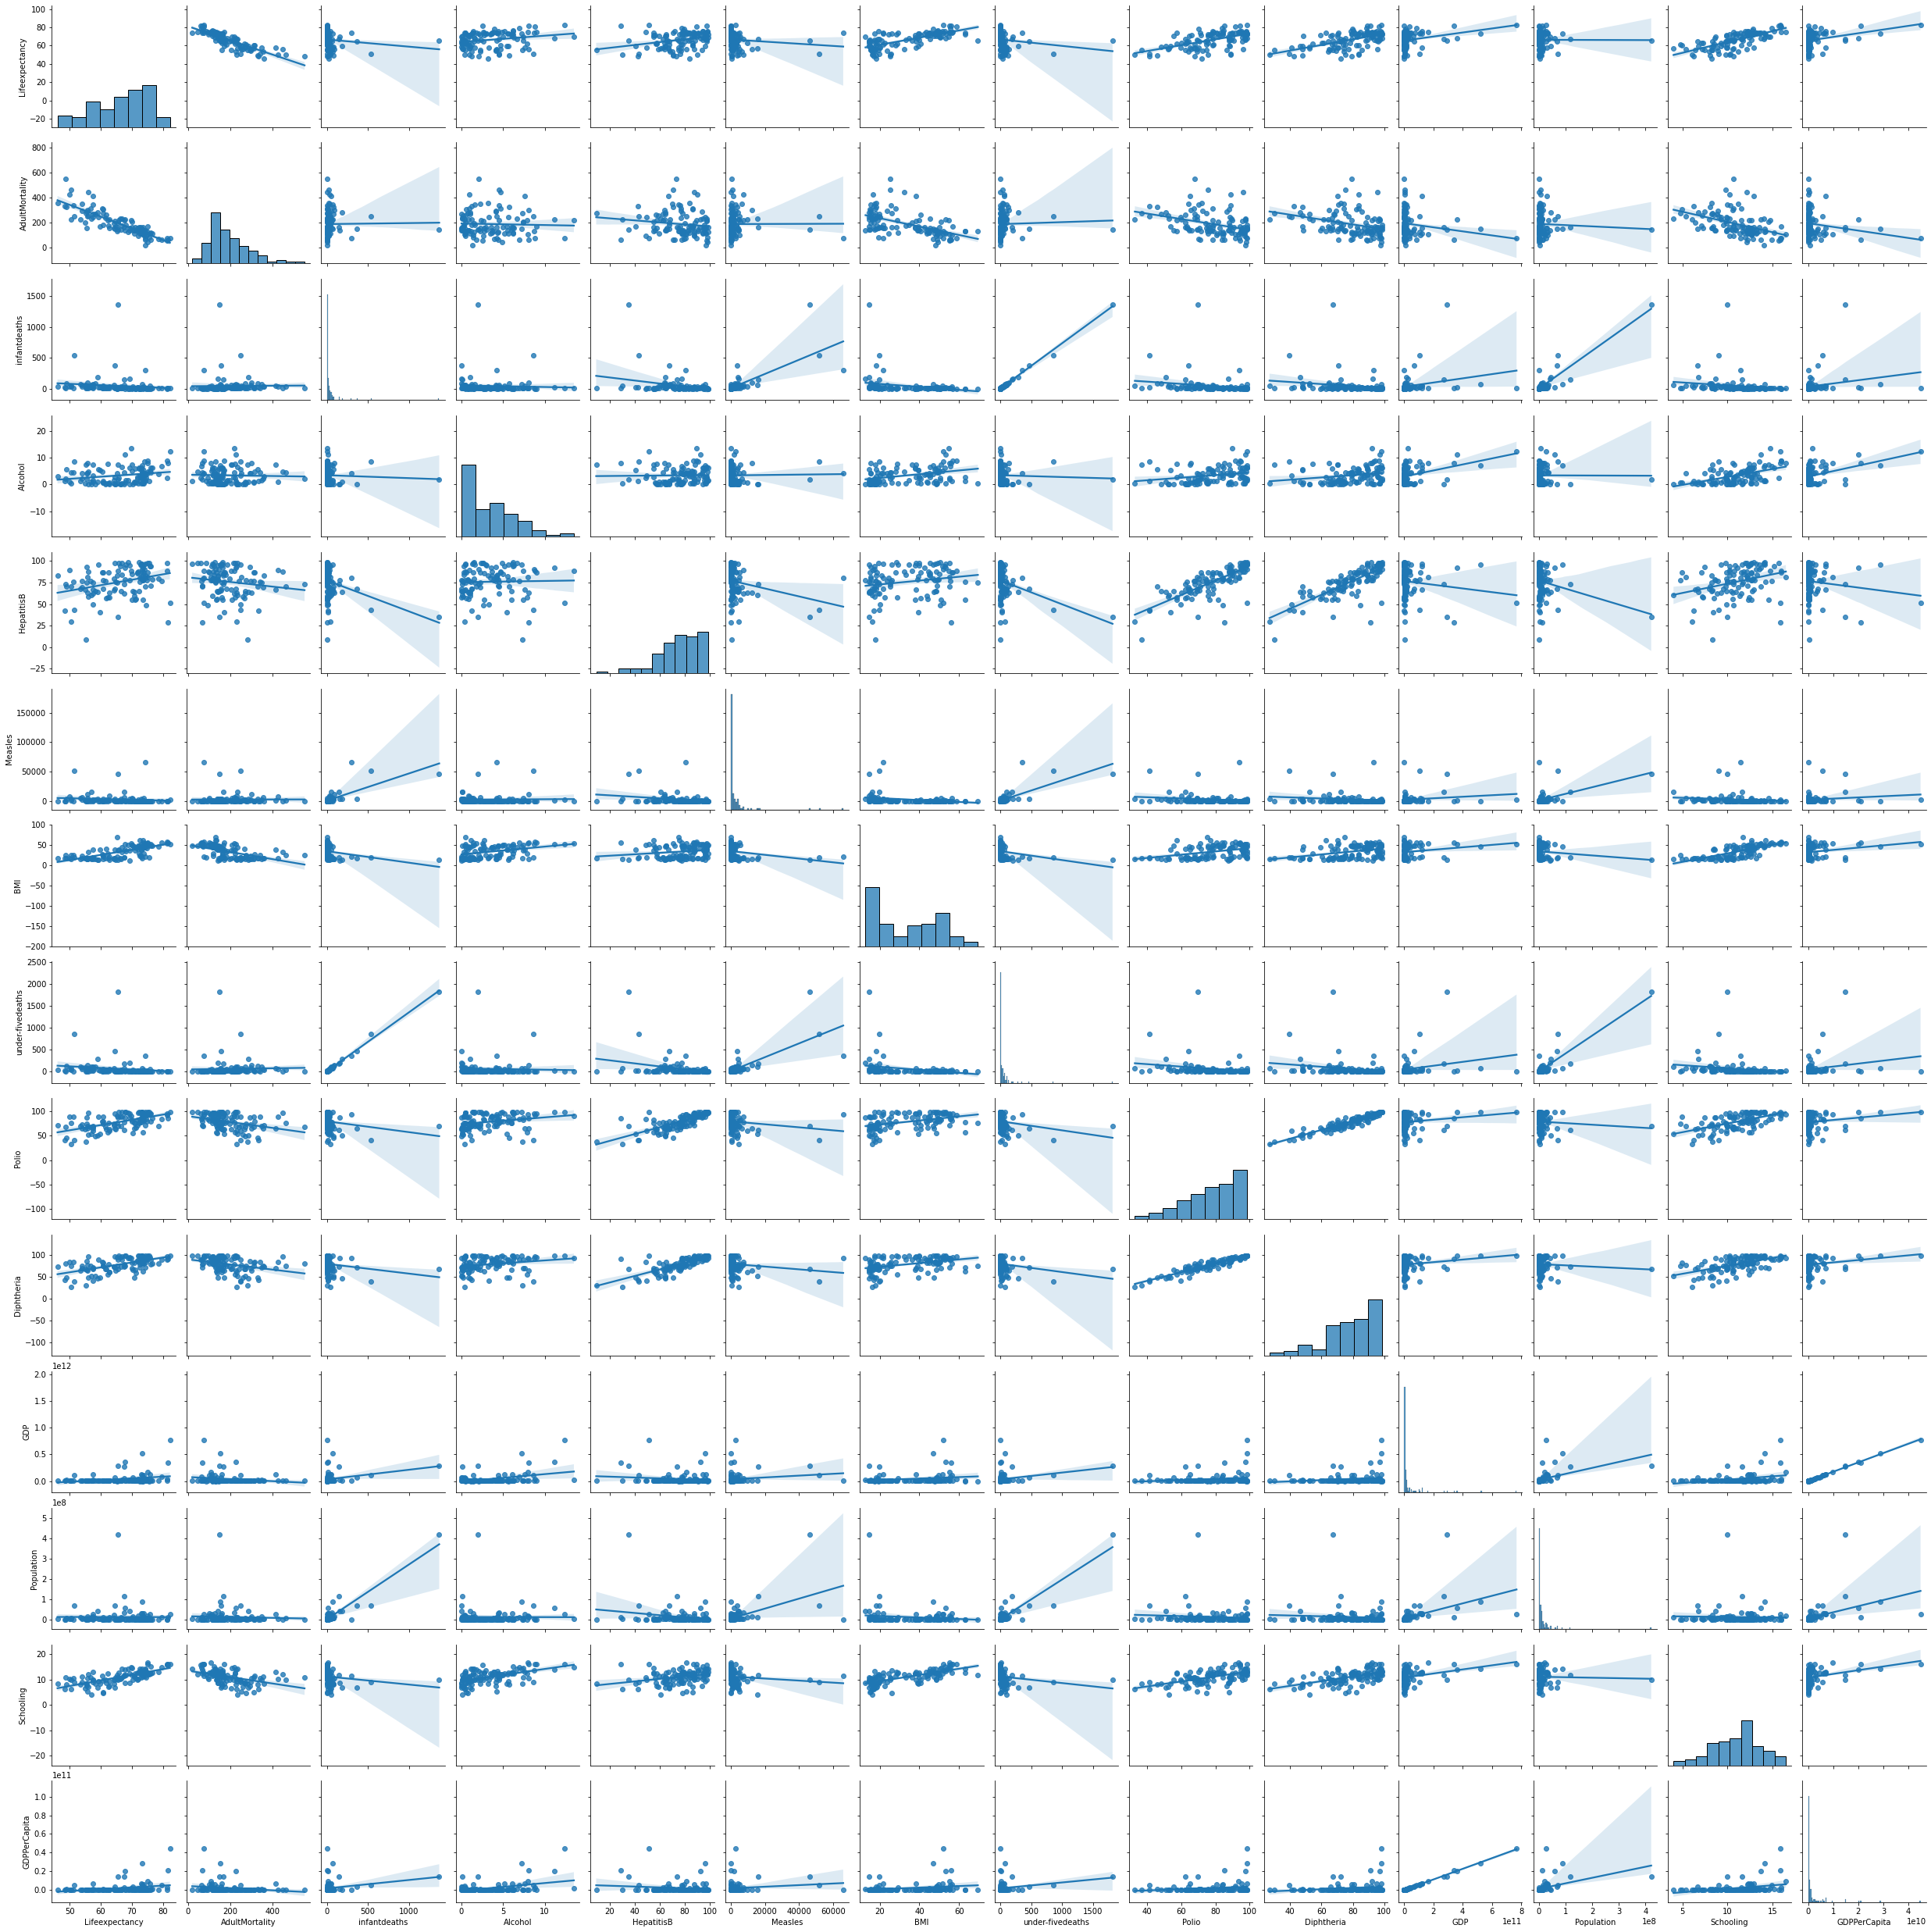

In [29]:
sns.pairplot(df3, kind="reg")

In [30]:
sns.pairplot(df2, hue="isDeveloped", kind="reg")

### Part 5: Calculate correlations (25pts)

<ul>
<li>5 points are for identifying and calculating 3 strongest correlations with life expectancy for each of developed and not developed. 
<li>10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?
<li>10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?
</ul>

<b>Please put your written parts in markdown cells, with a little formatting to make them readable. 

In [ ]:
#Calculate correlations and analyze. 
df3=df.apply(pd.to_numeric, errors='coerce')
developed=df3[df3['isDeveloped']==1]
developed = developed.drop(columns=["Country","isDeveloped"])
developed = developed.corr()
developed.head()

,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDPPerCapita
Lifeexpectancy,1.000000,-0.899359,-0.057183,-0.171770,-0.444695,-0.086277,0.199851,-0.017819,0.034499,-0.158312,0.490596,0.287785,0.418105,0.506213
AdultMortality,-0.899359,1.000000,0.216727,-0.005333,0.334286,0.178315,-0.165426,0.183252,-0.022663,0.093680,-0.344043,-0.148966,-0.289023,-0.355950
infantdeaths,-0.057183,0.216727,1.000000,-0.221295,0.135308,0.719403,0.157665,0.986796,0.207134,0.049995,0.593179,0.781328,0.085720,0.584929
Alcohol,-0.171770,-0.005333,-0.221295,1.000000,0.367880,-0.158748,-0.683514,-0.180704,-0.279539,-0.200160,-0.098270,-0.114638,0.045575,-0.103536
HepatitisB,-0.444695,0.334286,0.135308,0.367880,1.000000,0.154259,-0.112131,0.122126,-0.160261,-0.053976,-0.200392,-0.019519,-0.261785,-0.215494


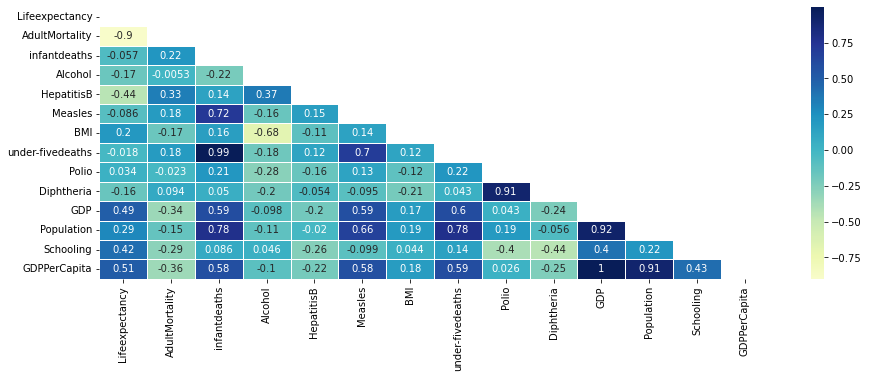

In [ ]:
mask = np.triu(np.ones_like(developed, dtype=bool))
sns.heatmap(developed, center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.show()

The lifexpectancy in developed countries is strongly corelated to 1)GDPPerCapita 2)GDP 3)Schooling 

In [ ]:
df3=df.apply(pd.to_numeric, errors='coerce')
not_developed=df3[df3['isDeveloped']==0]
not_developed = not_developed.drop(columns=["Country","isDeveloped"])
not_developed = not_developed.corr()
not_developed.head()

,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDPPerCapita
Lifeexpectancy,1.000000,-0.854801,-0.130055,0.234216,0.315167,-0.123550,0.704622,-0.159256,0.585020,0.588198,0.266061,-0.004356,0.723746,0.277426
AdultMortality,-0.854801,1.000000,0.012137,-0.038327,-0.148156,0.003598,-0.546226,0.032772,-0.362824,-0.337636,-0.177797,-0.044995,-0.453928,-0.184284
infantdeaths,-0.130055,0.012137,1.000000,-0.052514,-0.296759,0.727416,-0.263817,0.996890,-0.201312,-0.193709,0.248851,0.911464,-0.172519,0.217329
Alcohol,0.234216,-0.038327,-0.052514,1.000000,0.024648,0.022499,0.366599,-0.044058,0.256422,0.238434,0.396137,-0.005090,0.529299,0.408242
HepatitisB,0.315167,-0.148156,-0.296759,0.024648,1.000000,-0.240508,0.199874,-0.311084,0.765539,0.779146,-0.129230,-0.226902,0.329309,-0.130414


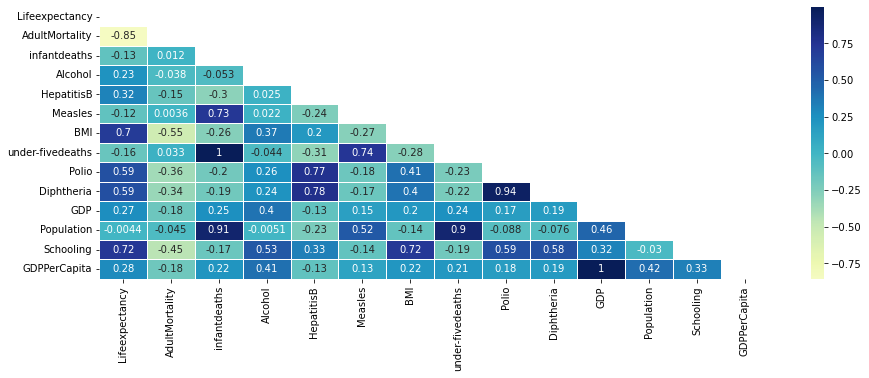

In [ ]:
mask = np.triu(np.ones_like(not_developed, dtype=bool))
sns.heatmap(not_developed, center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.show()

The lifexpectancy in developing countries is strongly corelated to 1)Schooling 2)BMI 3)Polio and Diphtheria

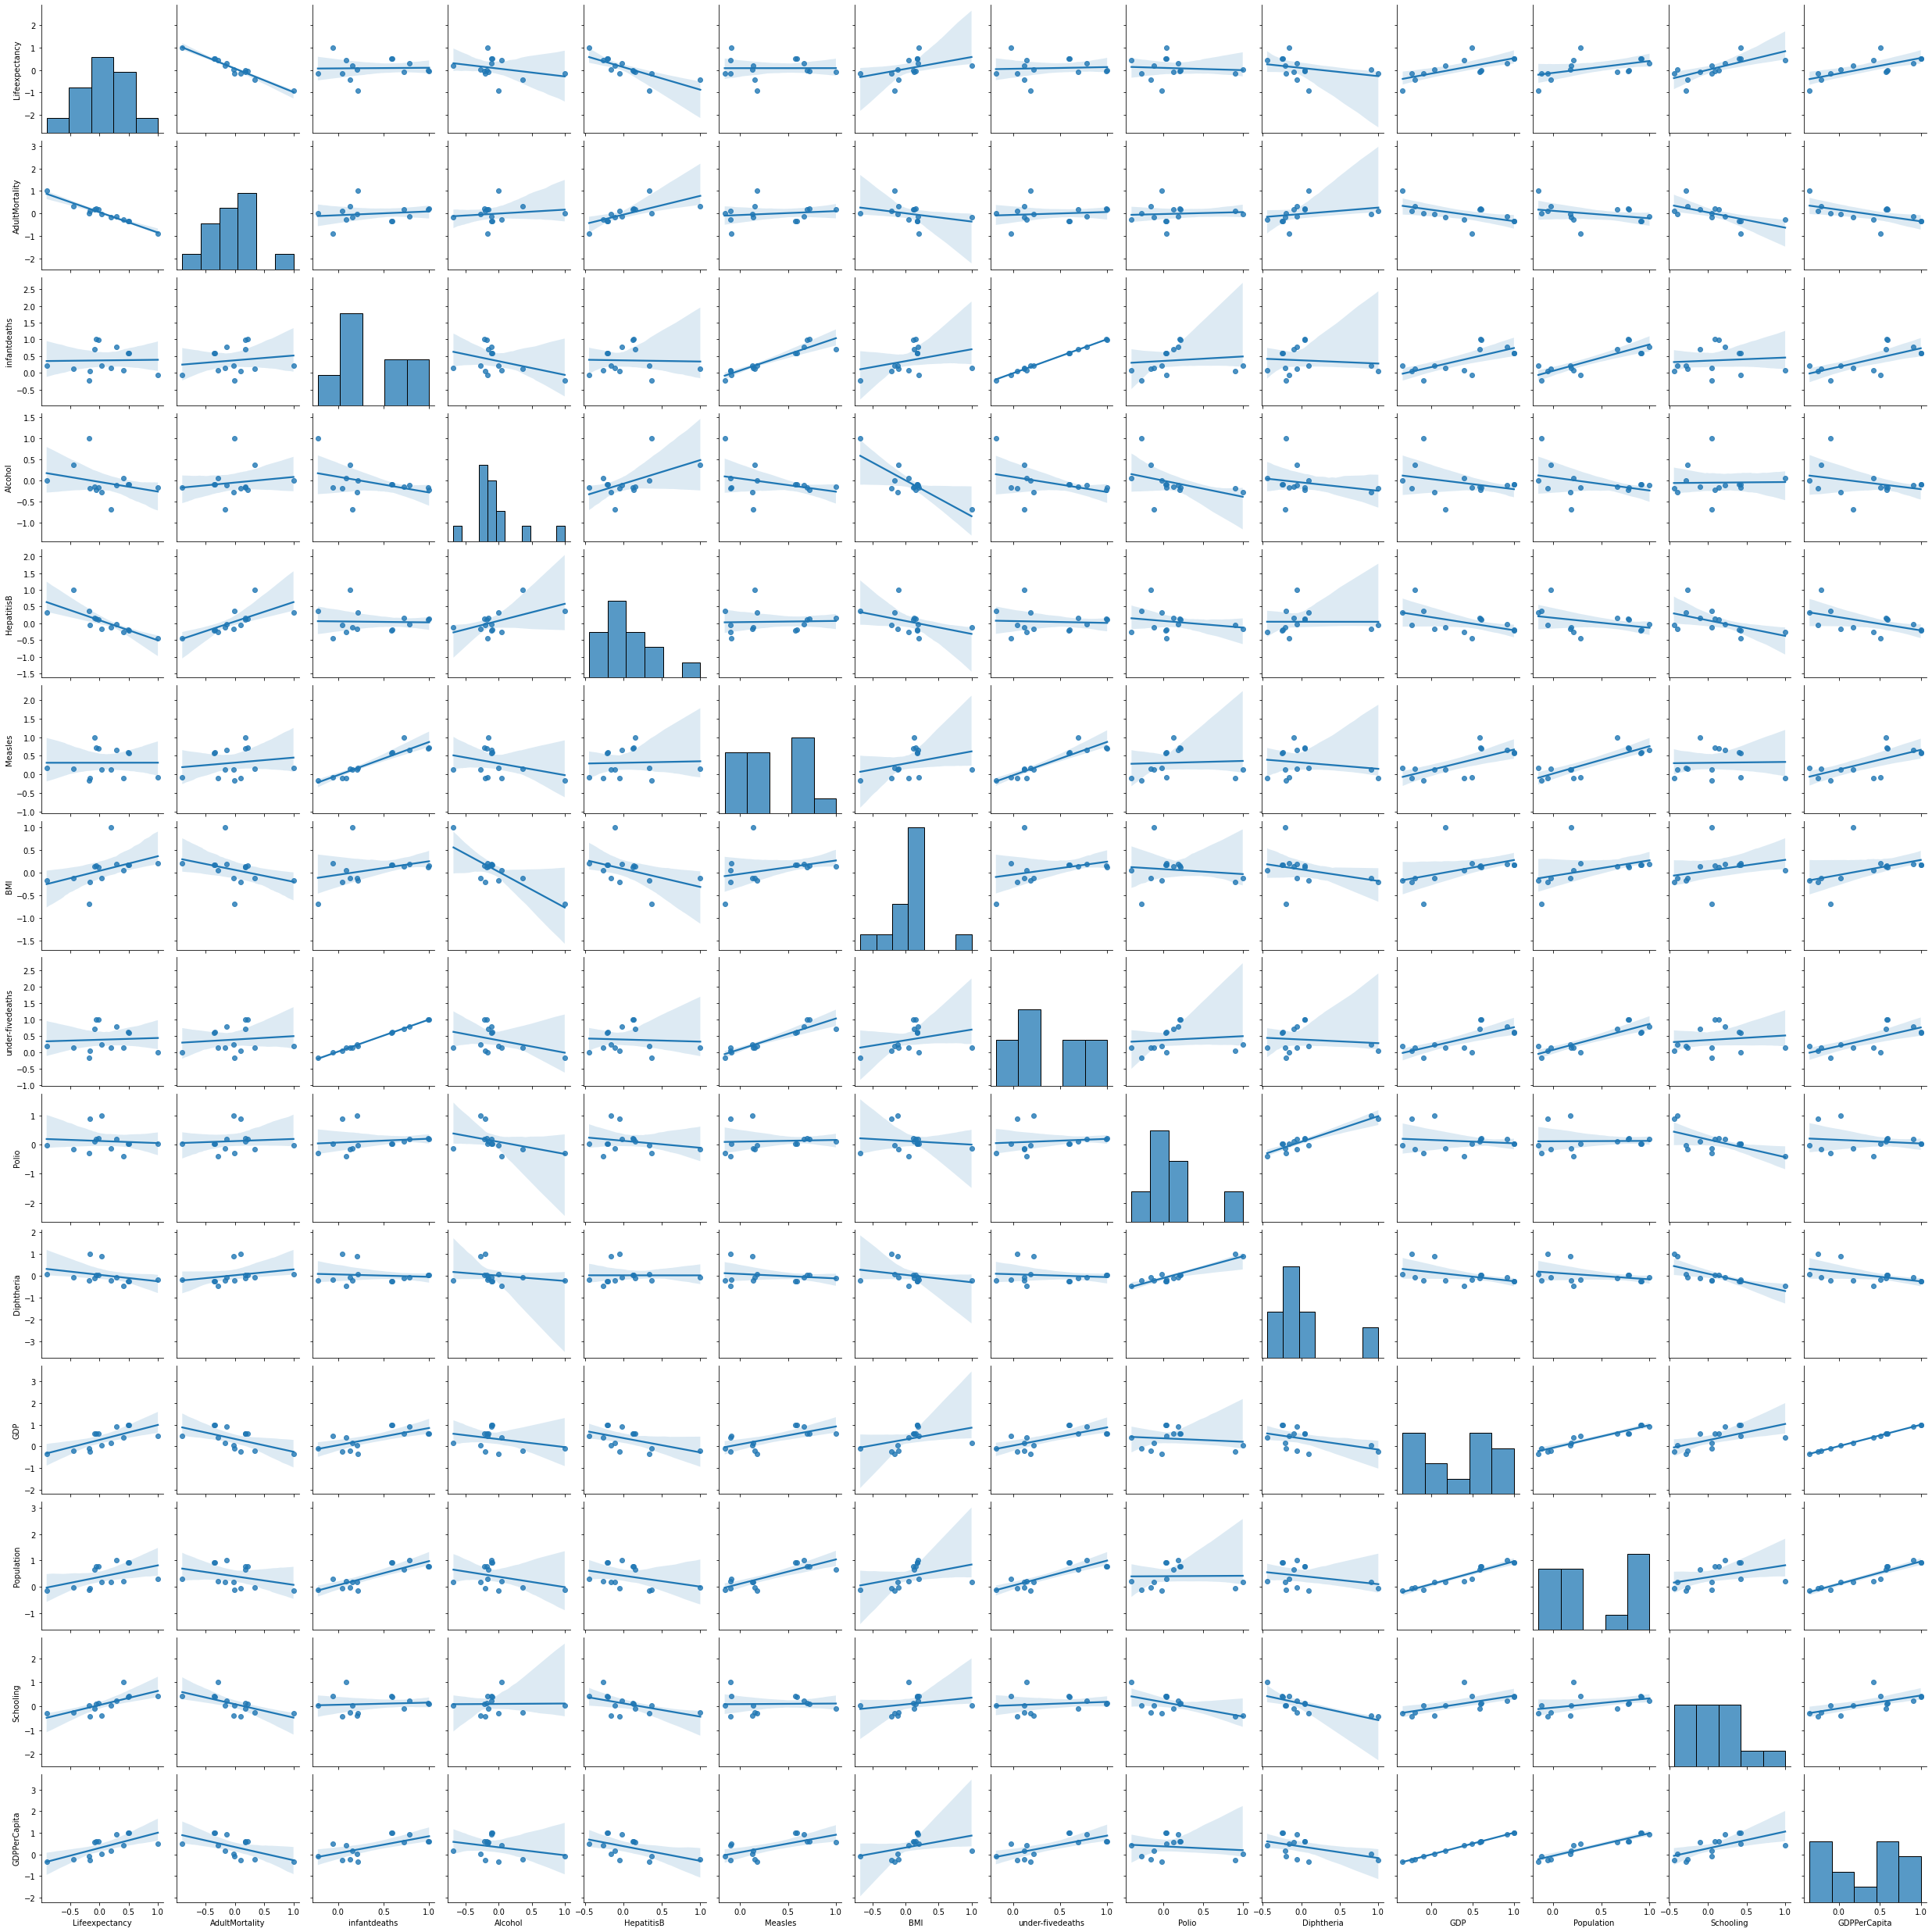

In [ ]:
sns.pairplot(developed, kind="reg")

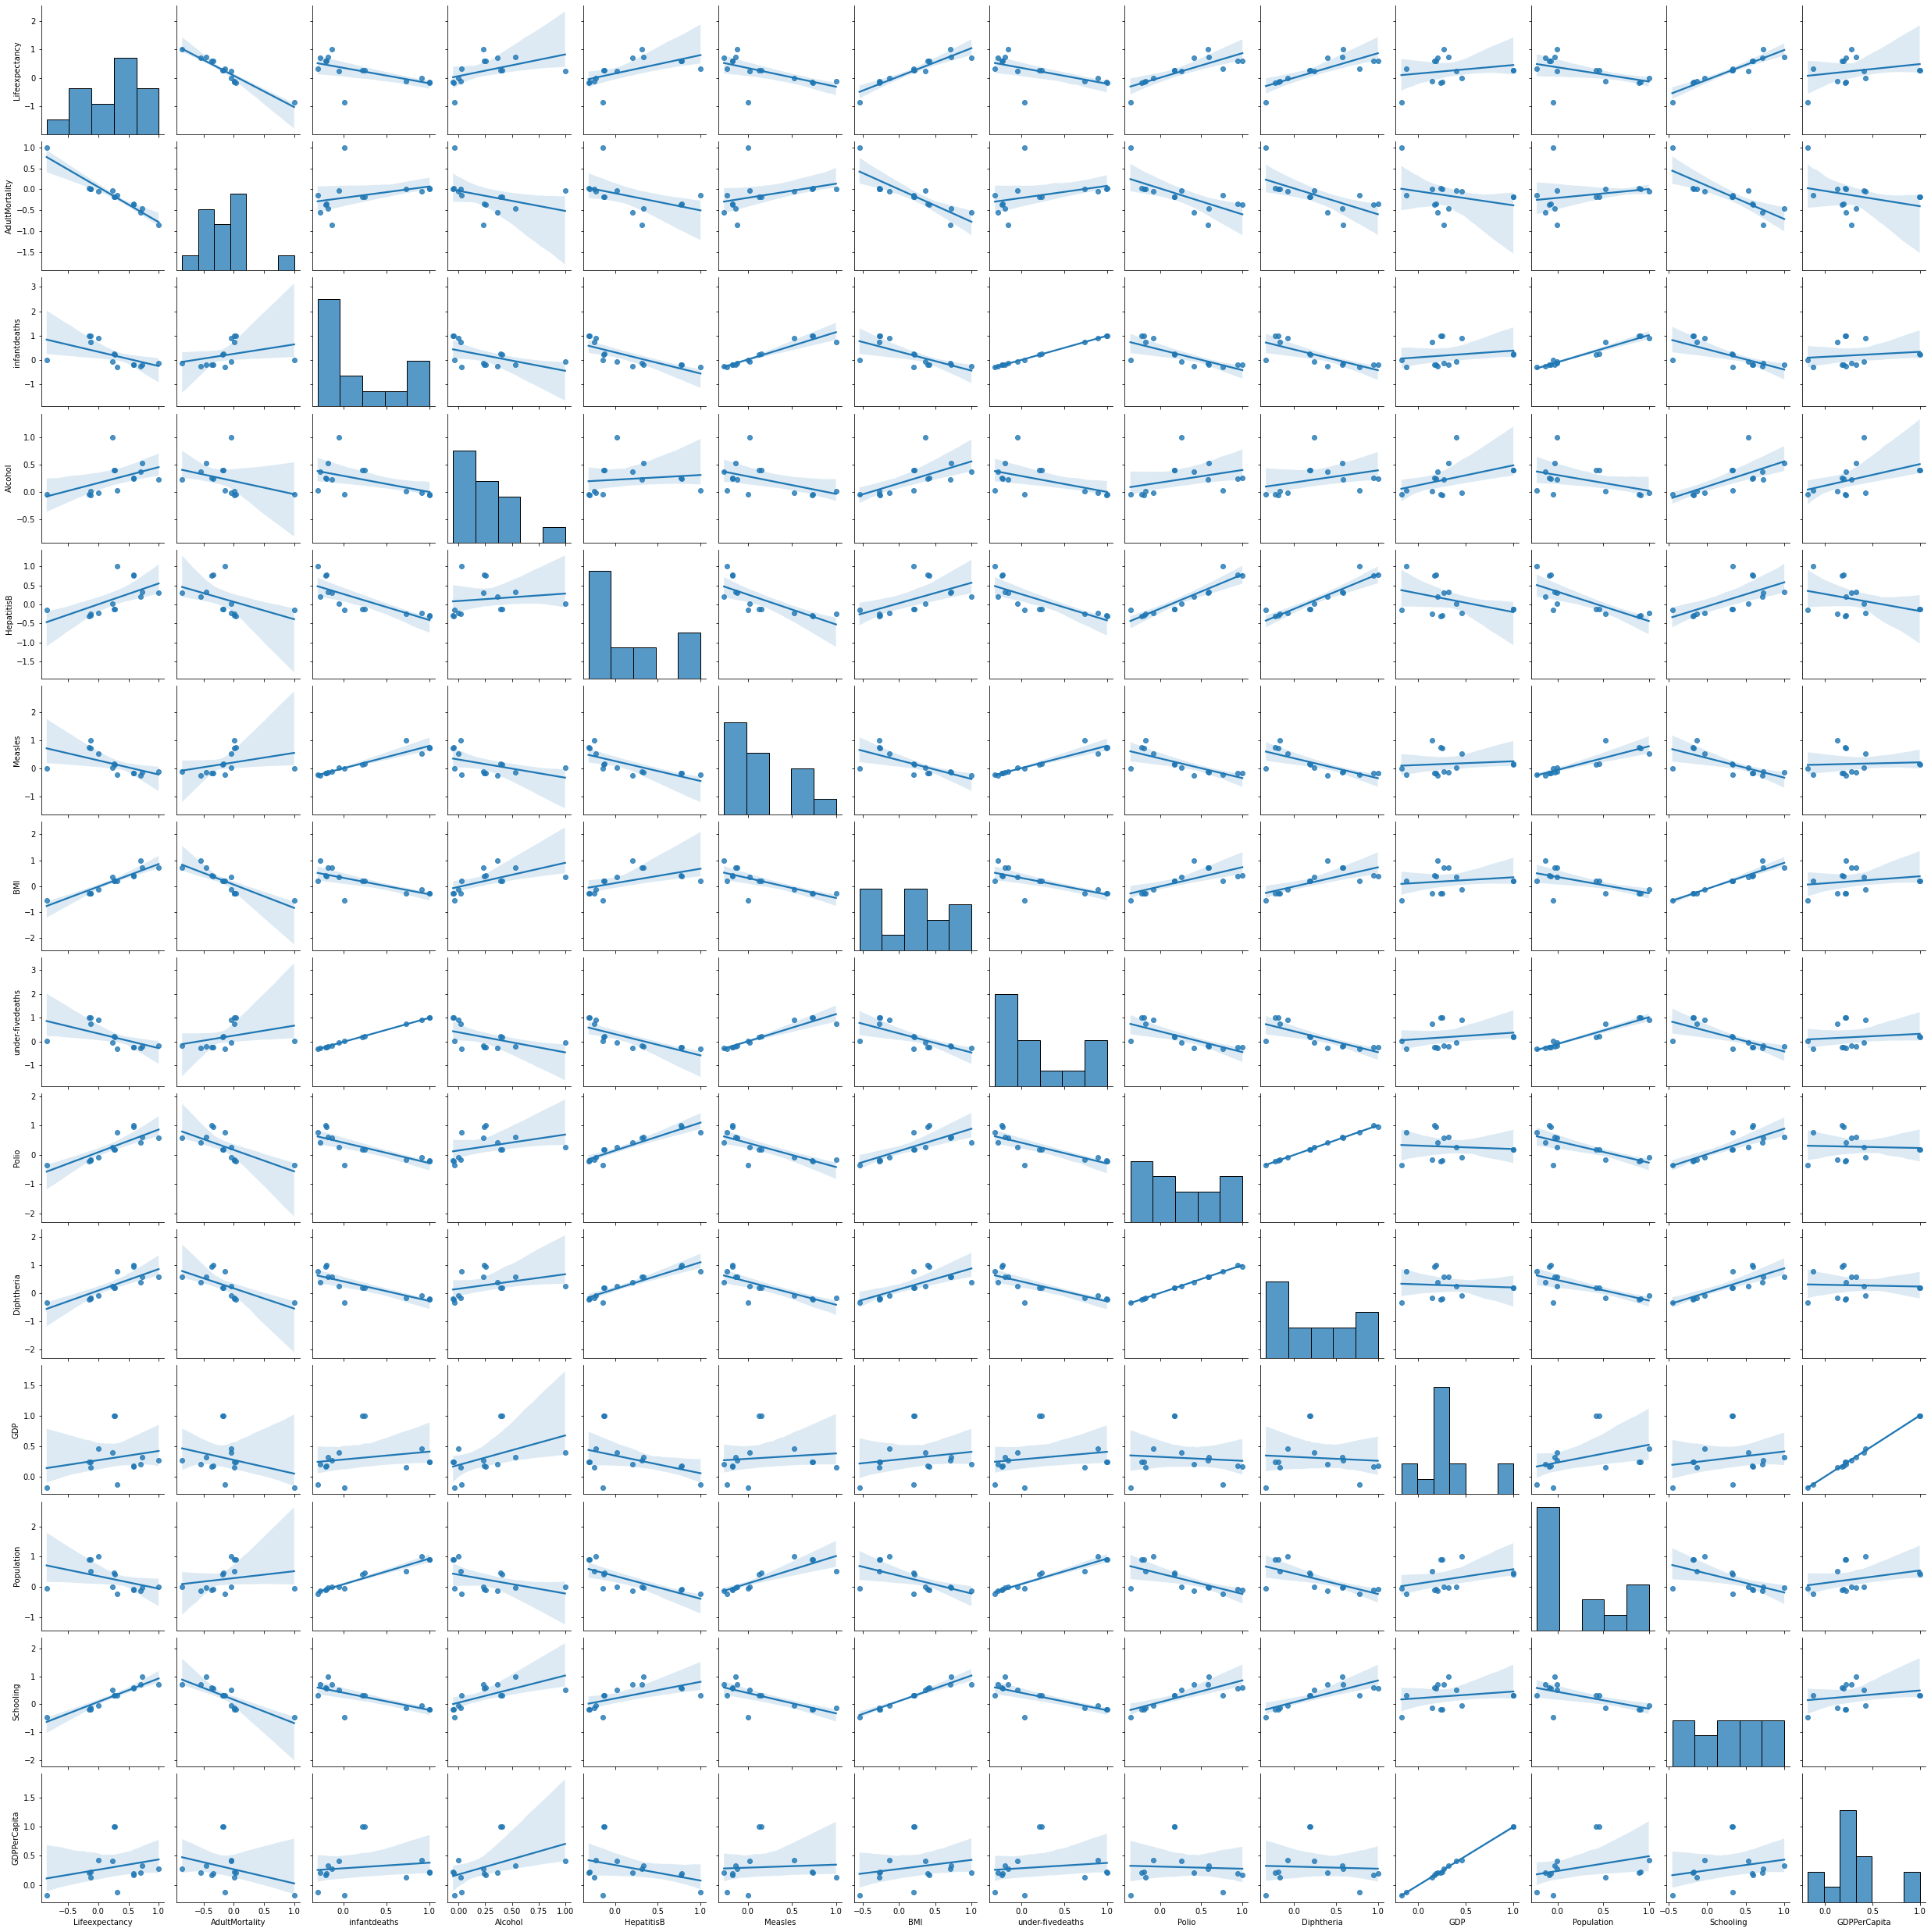

In [ ]:
sns.pairplot(not_developed, kind="reg")

The 2 areas where developing and developed country are sigificantly different in regards to lifeexpectancy is for polio and Diphtheria